# Imports

In [1]:
# import libraries
import pandas as pd
pd.options.mode.chained_assignment = None

import seaborn as sns
sns.set
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Date
import datetime as datetime

# QQ Plot
import scipy.stats
import pylab

## Import NOAA Data

In [2]:
results_raw_data = pd.read_csv('NOAA_Weather_Data_RAW.csv')

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (19,25,26,27,28,30,31,33,42,43,48,53,69,71,75,76,88,89,117) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
results_df = results_raw_data.copy()
results_df.head()

,STATION,DATE,REPORT_TYPE,SOURCE,AWND,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,...,ShortDurationPrecipitationValue060,ShortDurationPrecipitationValue080,ShortDurationPrecipitationValue100,ShortDurationPrecipitationValue120,ShortDurationPrecipitationValue150,ShortDurationPrecipitationValue180,Sunrise,Sunset,TStorms,WindEquipmentChangeDate
0,72505394728,2017-01-01T00:51:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,72505394728,2017-01-01T01:51:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,72505394728,2017-01-01T02:51:00,FM-15,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,72505394728,2017-01-01T03:51:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,72505394728,2017-01-01T04:51:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
for col in results_df.columns: 
    print(col)

STATION
DATE
REPORT_TYPE
SOURCE
AWND
BackupDirection
BackupDistance
BackupDistanceUnit
BackupElements
BackupElevation
BackupElevationUnit
BackupEquipment
BackupLatitude
BackupLongitude
BackupName
CDSD
CLDD
DSNW
DailyAverageDewPointTemperature
DailyAverageDryBulbTemperature
DailyAverageRelativeHumidity
DailyAverageSeaLevelPressure
DailyAverageStationPressure
DailyAverageWetBulbTemperature
DailyAverageWindSpeed
DailyCoolingDegreeDays
DailyDepartureFromNormalAverageTemperature
DailyHeatingDegreeDays
DailyMaximumDryBulbTemperature
DailyMinimumDryBulbTemperature
DailyPeakWindDirection
DailyPeakWindSpeed
DailyPrecipitation
DailySnowDepth
DailySnowfall
DailySustainedWindDirection
DailySustainedWindSpeed
DailyWeather
HDSD
HTDD
HeavyFog
HourlyAltimeterSetting
HourlyDewPointTemperature
HourlyDryBulbTemperature
HourlyPrecipitation
HourlyPresentWeatherType
HourlyPressureChange
HourlyPressureTendency
HourlyRelativeHumidity
HourlySeaLevelPressure
HourlySkyConditions
HourlyStationPressure
HourlyVisib

In [5]:
weather_df=results_df.copy()

In [6]:
#Opting for wetbuld temperature

weather_df = results_df[['DATE','HourlyPrecipitation',\
                          'HourlyWetBulbTemperature',\
                         'HourlyDryBulbTemperature',\
                          'HourlyWindSpeed',\
                         'DailyAverageDryBulbTemperature','DailyAverageRelativeHumidity',\
                         'DailyAverageWetBulbTemperature','DailyAverageWindSpeed',\
                         'DailyDepartureFromNormalAverageTemperature','DailyPrecipitation'\
                        ]]


weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36033 entries, 0 to 36032
Data columns (total 11 columns):
DATE                                          36033 non-null object
HourlyPrecipitation                           30097 non-null object
HourlyWetBulbTemperature                      34520 non-null object
HourlyDryBulbTemperature                      34804 non-null object
HourlyWindSpeed                               28188 non-null float64
DailyAverageDryBulbTemperature                1095 non-null object
DailyAverageRelativeHumidity                  1030 non-null float64
DailyAverageWetBulbTemperature                1029 non-null float64
DailyAverageWindSpeed                         942 non-null float64
DailyDepartureFromNormalAverageTemperature    1095 non-null object
DailyPrecipitation                            1095 non-null object
dtypes: float64(4), object(7)
memory usage: 3.0+ MB


In [7]:
weather_df['DATE']=pd.to_datetime\
(weather_df['DATE'], yearfirst=True, errors='coerce').dt.round('D')
weather_df.head()

,DATE,HourlyPrecipitation,HourlyWetBulbTemperature,HourlyDryBulbTemperature,HourlyWindSpeed,DailyAverageDryBulbTemperature,DailyAverageRelativeHumidity,DailyAverageWetBulbTemperature,DailyAverageWindSpeed,DailyDepartureFromNormalAverageTemperature,DailyPrecipitation
0,2017-01-01,0.00,37,44,3.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-01,T,37,44,5.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-01,0.00,37,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-01,0.00,37,44,10.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-01,0.00,37,45,7.0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# weather_df['DATE'] = weather_df['DATE'].\
# apply(lambda x: x.strftime('%Y-%m-%d')if not pd.isnull(x) else '')

In [9]:
# # DATE
# weather_df['DATE']=pd.to_datetime(weather_df['DATE'], yearfirst=True, errors='coerce')
# weather_df.head()

In [10]:
weather_df.DATE.describe()

count                   36033
unique                   1096
top       2018-02-11 00:00:00
freq                       97
first     2017-01-01 00:00:00
last      2020-01-01 00:00:00
Name: DATE, dtype: object

In [11]:
weather_df.rename(columns={'DATE':'time_issued'}, inplace=True)

In [12]:
# Precipitation

weather_df['HourlyPrecipitation']=weather_df['HourlyPrecipitation'].replace('s','', regex=True)
weather_df['HourlyPrecipitation']=weather_df['HourlyPrecipitation'].replace('T',0, regex=True)
weather_df['HourlyPrecipitation'] = weather_df['HourlyPrecipitation'].astype(float)
#
weather_df['DailyPrecipitation']=weather_df['DailyPrecipitation'].replace('s','', regex=True)
weather_df['DailyPrecipitation']=weather_df['DailyPrecipitation'].replace('T',0, regex=True)
weather_df['DailyPrecipitation'] = weather_df['DailyPrecipitation'].astype(float)
# 
# weather_df['DailyAverageRelativeHumidity'] = weather_df['DailyAverageRelativeHumidity'].astype(float)

In [13]:
# Temperature

weather_df.loc[weather_df['HourlyWetBulbTemperature']=='*', 'HourlyWetBulbTemperature']= np.nan
weather_df['HourlyWetBulbTemperature'] = weather_df['HourlyWetBulbTemperature'].astype(float)

# HourlyDryBulbTemperature
weather_df.loc[weather_df['HourlyDryBulbTemperature']=='*', 'HourlyDryBulbTemperature']= np.nan
weather_df['HourlyDryBulbTemperature']=weather_df['HourlyDryBulbTemperature'].replace('s','', regex=True)
weather_df['HourlyDryBulbTemperature'] = weather_df['HourlyDryBulbTemperature'].astype(float)


weather_df.loc[weather_df['DailyAverageDryBulbTemperature']=='*', 'DailyAverageDryBulbTemperature']= np.nan
weather_df['DailyAverageDryBulbTemperature']=weather_df['DailyAverageDryBulbTemperature'].replace('s','', regex=True)
weather_df['DailyAverageDryBulbTemperature'] = weather_df['DailyAverageDryBulbTemperature'].astype(float)


weather_df.loc[weather_df['DailyAverageWetBulbTemperature']=='*', 'DailyAverageWetBulbTemperature']= np.nan
weather_df['DailyAverageWetBulbTemperature'] = weather_df['DailyAverageWetBulbTemperature'].astype(float)


weather_df.loc[weather_df['DailyDepartureFromNormalAverageTemperature']=='*', 'DailyDepartureFromNormalAverageTemperature']= np.nan
weather_df['DailyDepartureFromNormalAverageTemperature']=weather_df['DailyDepartureFromNormalAverageTemperature'].replace('s','', regex=True)
weather_df['DailyDepartureFromNormalAverageTemperature'] = weather_df['DailyDepartureFromNormalAverageTemperature'].astype(float)


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [14]:
# Wind Speed
weather_df['HourlyWindSpeed'] = weather_df['HourlyWindSpeed'].astype(float)

weather_df['DailyAverageWindSpeed'] = weather_df['DailyAverageWindSpeed'].astype(float)


In [15]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36033 entries, 0 to 36032
Data columns (total 11 columns):
time_issued                                   36033 non-null datetime64[ns]
HourlyPrecipitation                           30097 non-null float64
HourlyWetBulbTemperature                      34514 non-null float64
HourlyDryBulbTemperature                      34798 non-null float64
HourlyWindSpeed                               28188 non-null float64
DailyAverageDryBulbTemperature                1095 non-null float64
DailyAverageRelativeHumidity                  1030 non-null float64
DailyAverageWetBulbTemperature                1029 non-null float64
DailyAverageWindSpeed                         942 non-null float64
DailyDepartureFromNormalAverageTemperature    1095 non-null float64
DailyPrecipitation                            1095 non-null float64
dtypes: datetime64[ns](1), float64(10)
memory usage: 3.0 MB


## Clean Data

## EDA

In [16]:
weather_df.describe()

,HourlyPrecipitation,HourlyWetBulbTemperature,HourlyDryBulbTemperature,HourlyWindSpeed,DailyAverageDryBulbTemperature,DailyAverageRelativeHumidity,DailyAverageWetBulbTemperature,DailyAverageWindSpeed,DailyDepartureFromNormalAverageTemperature,DailyPrecipitation
count,30097.000000,34514.000000,34798.000000,28188.000000,1095.000000,1030.000000,1029.000000,942.000000,1095.000000,1095.000000
mean,0.012213,50.432984,55.580206,4.928054,56.282192,63.515534,50.276968,4.849045,1.256712,0.149425
std,0.053741,15.997332,17.009880,13.804323,17.311582,15.845502,16.179563,2.395615,7.664360,0.359759
min,0.000000,0.000000,2.000000,0.000000,9.000000,21.000000,6.000000,0.000000,-24.100000,0.000000
25%,0.000000,37.000000,42.000000,3.000000,42.000000,52.000000,37.000000,3.100000,-3.700000,0.000000
50%,0.000000,52.000000,56.000000,5.000000,57.000000,62.000000,52.000000,4.400000,1.000000,0.000000
75%,0.000000,65.000000,70.000000,7.000000,72.000000,76.000000,65.000000,6.175000,5.800000,0.080000
max,1.690000,81.000000,95.000000,2237.000000,89.000000,98.000000,77.000000,18.300000,30.700000,3.030000


In [17]:
weather_df.isna().sum()

time_issued                                       0
HourlyPrecipitation                            5936
HourlyWetBulbTemperature                       1519
HourlyDryBulbTemperature                       1235
HourlyWindSpeed                                7845
DailyAverageDryBulbTemperature                34938
DailyAverageRelativeHumidity                  35003
DailyAverageWetBulbTemperature                35004
DailyAverageWindSpeed                         35091
DailyDepartureFromNormalAverageTemperature    34938
DailyPrecipitation                            34938
dtype: int64

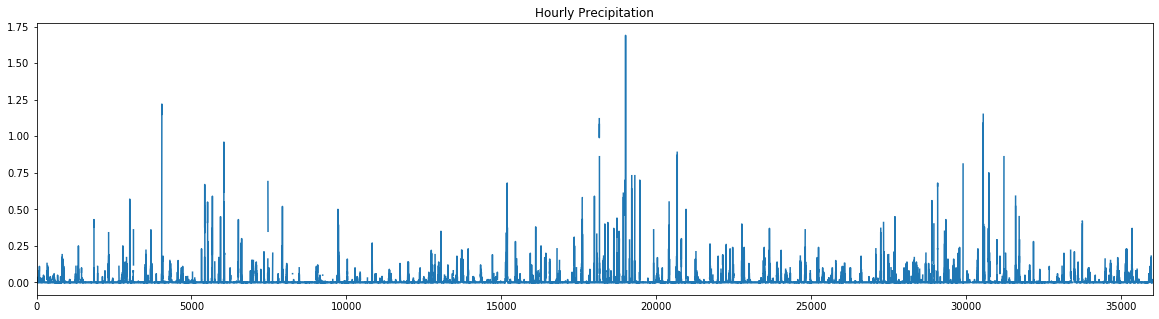

In [18]:
weather_df.HourlyPrecipitation.plot(title='Hourly Precipitation',figsize=(20,5))

Text(0.5, 1.0, 'Hourly Temperature')

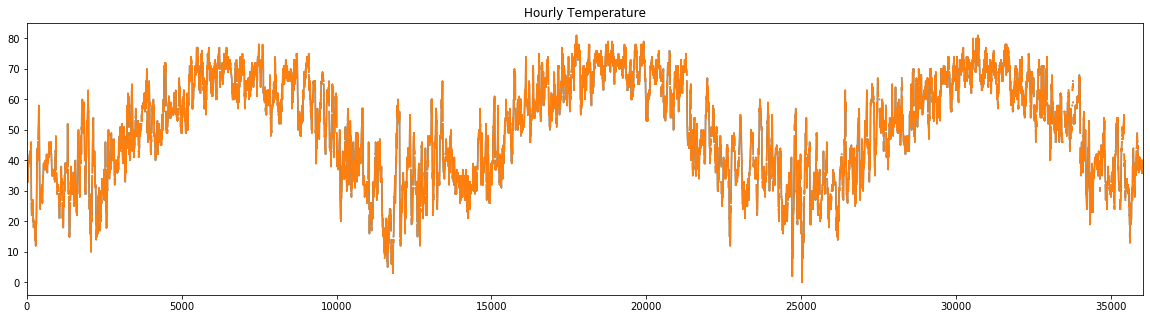

In [19]:
weather_df.HourlyWetBulbTemperature.plot(title='wet',figsize=(20,5))
weather_df.HourlyWetBulbTemperature.plot(title='dry',figsize=(20,5))
plt.title('Hourly Temperature')

### QQ Plot

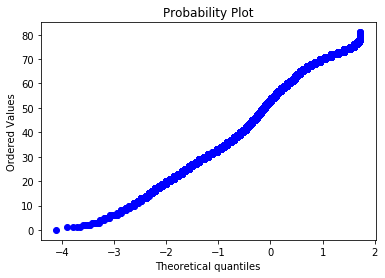

In [20]:
scipy.stats.probplot(weather_df.HourlyWetBulbTemperature, plot=pylab)
pylab.show()

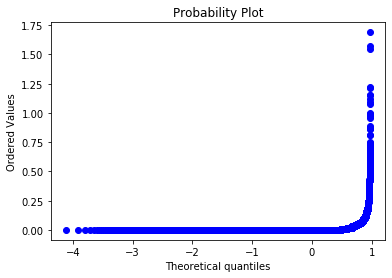

In [21]:
scipy.stats.probplot(weather_df.HourlyPrecipitation, plot=pylab)
pylab.show()

In [22]:
weather_df.head()

,time_issued,HourlyPrecipitation,HourlyWetBulbTemperature,HourlyDryBulbTemperature,HourlyWindSpeed,DailyAverageDryBulbTemperature,DailyAverageRelativeHumidity,DailyAverageWetBulbTemperature,DailyAverageWindSpeed,DailyDepartureFromNormalAverageTemperature,DailyPrecipitation
0,2017-01-01,0.0,37.0,44.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-01,0.0,37.0,44.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-01,0.0,37.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-01,0.0,37.0,44.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-01,0.0,37.0,45.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36033 entries, 0 to 36032
Data columns (total 11 columns):
time_issued                                   36033 non-null datetime64[ns]
HourlyPrecipitation                           30097 non-null float64
HourlyWetBulbTemperature                      34514 non-null float64
HourlyDryBulbTemperature                      34798 non-null float64
HourlyWindSpeed                               28188 non-null float64
DailyAverageDryBulbTemperature                1095 non-null float64
DailyAverageRelativeHumidity                  1030 non-null float64
DailyAverageWetBulbTemperature                1029 non-null float64
DailyAverageWindSpeed                         942 non-null float64
DailyDepartureFromNormalAverageTemperature    1095 non-null float64
DailyPrecipitation                            1095 non-null float64
dtypes: datetime64[ns](1), float64(10)
memory usage: 3.0 MB


### Time Prep

In [24]:
weather=weather_df.groupby(["time_issued"])\
.agg({'HourlyPrecipitation':'mean', \
      'HourlyWetBulbTemperature':'mean', 'HourlyWindSpeed':'mean'})

weather= weather.asfreq('B')
weather.head()

,HourlyPrecipitation,HourlyWetBulbTemperature,HourlyWindSpeed
time_issued,,,
2017-01-02,0.001667,34.625000,5.956522
2017-01-03,0.013333,38.923077,11.410256
2017-01-04,0.025135,41.947368,8.245283
2017-01-05,0.000000,30.080000,10.052632
2017-01-06,0.003714,26.000000,4.696970


In [25]:
# Rename columns

weather.rename(columns={'HourlyPrecipitation':'Precipitation', \
                           'HourlyWetBulbTemperature':'Temperature', \
                           'HourlyWindSpeed':'Wind'}, inplace=True)

In [26]:
weather.to_csv('CLEAN_weather_200416.csv')

### DO NOT DELETE - Optional Code

In [27]:
# #Opting for wetbuld temperature

# hour_weather_df = weather_df[['DATE','HourlyPrecipitation',\
#                           'HourlyVisibility','HourlyWetBulbTemperature',\
#                           'HourlyWindSpeed',\
#                         ]]

# day_weather_df = weather_df[['DATE',\
#                          'DailyAverageDryBulbTemperature','DailyAverageRelativeHumidity',\
#                          'DailyAverageWetBulbTemperature','DailyAverageWindSpeed',\
#                          'DailyDepartureFromNormalAverageTemperature','DailyPrecipitation'\
#                         ]]
# day_weather_df.head()

In [28]:
# min(weather_df['DATE'])
# max(weather_df['DATE'])